In [5]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
iris=datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

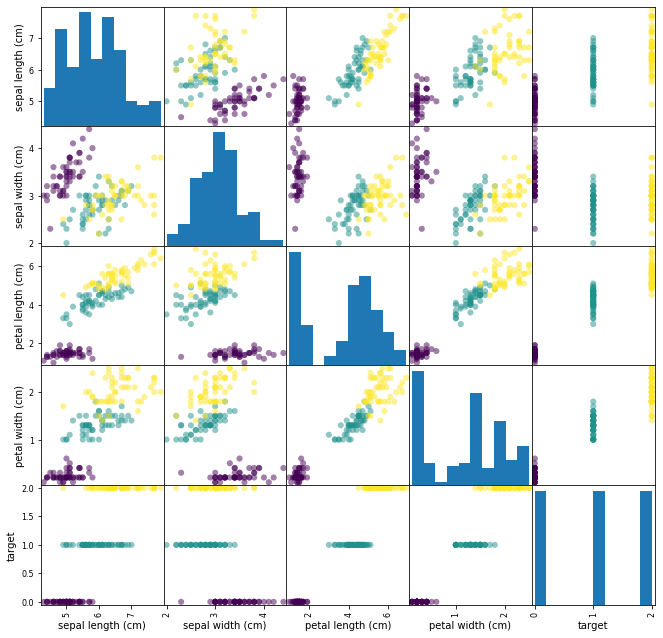

In [6]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
irsidataset=pd.DataFrame(iris.data, columns=iris.feature_names)
irsidataset['target']=iris.target
#iris.target
scatter_matrix(irsidataset, c=iris.target, figsize=[11,11], s=150)
plt.show()

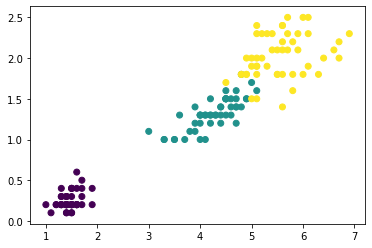

In [7]:
x=iris.data[:,[2,3]]
y=iris.target
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.40,  random_state=42, stratify=iris.target)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0])

In [31]:
print(classifier.score(X_test,y_test))

0.9333333333333333


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[20  0  0]
 [ 0 20  0]
 [ 0  4 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.83      1.00      0.91        20
           2       1.00      0.80      0.89        20

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

Accuracy: 0.9333333333333333


In [33]:
#Over Fitting and Under Fitting
import numpy as np
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [34]:
for i,k in enumerate(neighbors):
 knn_model = KNeighborsClassifier(n_neighbors=k)
 knn_model.fit(X_train, y_train)
 train_accuracy[i] = knn_model.score(X_train, y_train)
 test_accuracy[i] = knn_model.score(X_test, y_test)

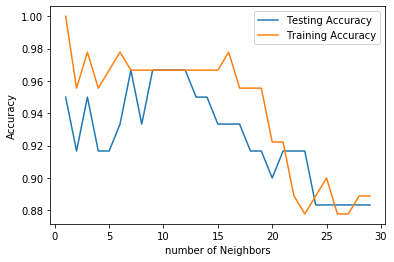

In [35]:
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
